In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('csv_files/iris.csv')
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
135,7.7,3.0,6.1,2.3,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
74,6.4,2.9,4.3,1.3,Iris-versicolor


<AxesSubplot: xlabel='Species', ylabel='count'>

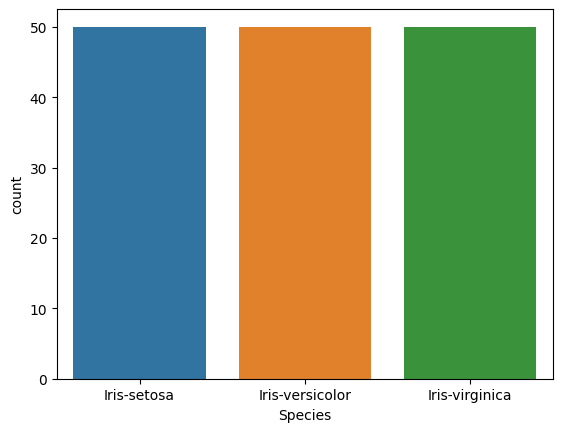

In [4]:
sns.countplot(x='Species',data=df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 5)

In [9]:
df.rename(columns={"SepalLengthCm":"sl","SepalWidthCm":"sw","PetalLengthCm":"pl","PetalWidthCm":"pw"},inplace=True)

In [10]:
df.head()

,sl,sw,pl,pw,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


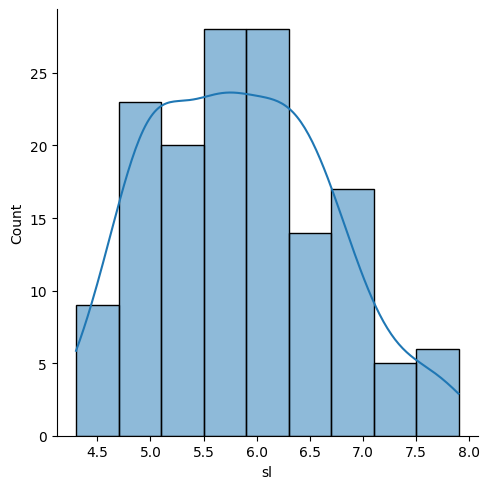

In [44]:
sns.displot(df['sl'],kde=True)

<AxesSubplot: xlabel='sl', ylabel='pl'>

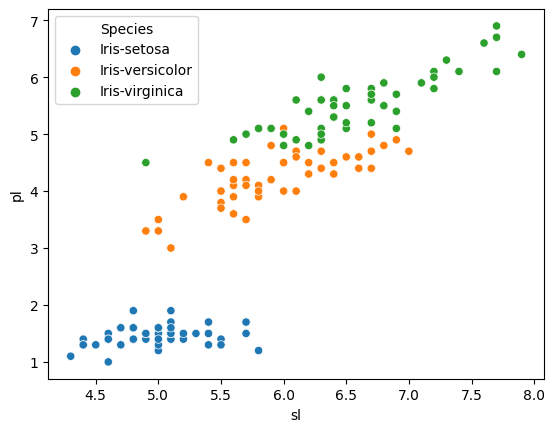

In [23]:
sns.scatterplot(x=df['sl'],y=df['pl'],hue=df['Species'])

<AxesSubplot: xlabel='sl', ylabel='pw'>

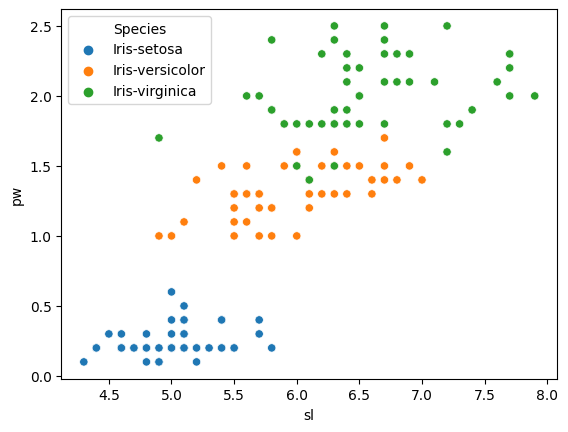

In [24]:
sns.scatterplot(x=df['sl'],y=df['pw'],hue=df['Species'])

<AxesSubplot: xlabel='sl', ylabel='sw'>

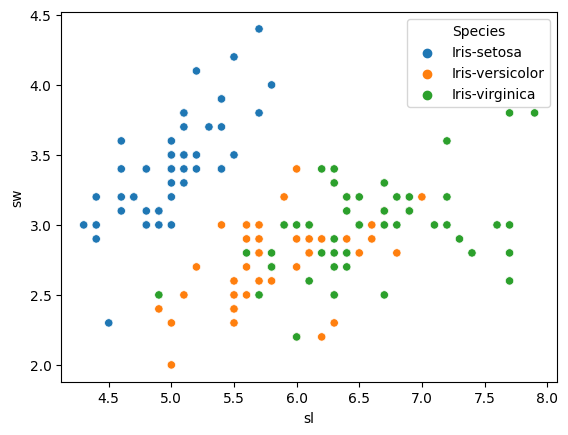

In [25]:
sns.scatterplot(x=df['sl'],y=df['sw'],hue=df['Species'])

<AxesSubplot: xlabel='pl', ylabel='pw'>

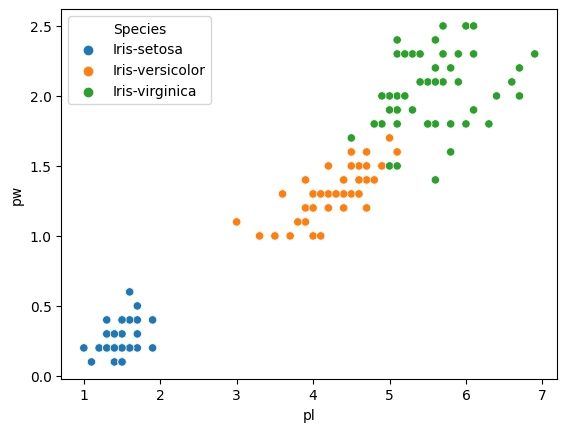

In [26]:
sns.scatterplot(x=df['pl'],y=df['pw'],hue=df['Species'])

In [76]:
x = df.iloc[:,:4]
y = df.iloc[:,-1]

In [77]:
x.shape

(150, 4)

In [78]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20)

In [81]:
x_train.shape

(120, 4)

In [82]:
y_train.shape

(120,)

In [83]:
x_train.shape[0]

120

In [84]:
np.sqrt(x_train.shape[0])

10.954451150103322

In [85]:
k = 11

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=k)

In [88]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [89]:
y_pred = knn.predict(x_test)

In [90]:
y_pred.shape

(30,)

In [91]:
y_test.shape

(30,)

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [94]:
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [95]:
y_test

40         Iris-setosa
96     Iris-versicolor
68     Iris-versicolor
43         Iris-setosa
97     Iris-versicolor
42         Iris-setosa
94     Iris-versicolor
95     Iris-versicolor
81     Iris-versicolor
101     Iris-virginica
50     Iris-versicolor
137     Iris-virginica
78     Iris-versicolor
2          Iris-setosa
87     Iris-versicolor
11         Iris-setosa
23         Iris-setosa
18         Iris-setosa
109     Iris-virginica
22         Iris-setosa
107     Iris-virginica
146     Iris-virginica
119     Iris-virginica
139     Iris-virginica
84     Iris-versicolor
115     Iris-virginica
138     Iris-virginica
144     Iris-virginica
67     Iris-versicolor
103     Iris-virginica
Name: Species, dtype: object

In [113]:
def predic_flower():
    sl = float(input("Enter SepalLengthCm :: "))
    sw = float(input("Enter SepalWidthCm :: "))
    pl = float(input("Enter PetalLengthCm :: "))    
    pw = float(input("Enter PetalWidthCm :: "))
    
    x_new = np.array([[sl],[sw],[pl],[pw]]).reshape(1,4)
    knn.fit(x_train,y_train)
    return knn.predict(x_new)[0]

In [120]:
predic_flower()

Enter SepalLengthCm :: 1.2
Enter SepalWidthCm :: 1.3
Enter PetalLengthCm :: 4.2
Enter PetalWidthCm :: 4.5


C:\Users\subha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Iris-versicolor'

In [121]:
x_train.shape

(120, 4)